<h1>Auto-MPG Regression - ANN</h1>

MPG steht für Miles-per-gallon. Ziel ist es den Verbrauch von Fahrzeugen vorherzusagen.

Dataset:<br>

>Auto-mpg dataset - Mileage per gallon performances of various cars <br>
> https://www.kaggle.com/datasets/uciml/autompg-dataset [Letzter Zugriff: 06.07.2024]

In [15]:
# Imorts.
import tensorflow as tf
import pandas     as pd
import seaborn   as sn
import matplotlib.pyplot as plt

from sklearn.preprocessing   import MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
# Lade Daten in Dataframe.
data_df = pd.read_csv('./data/datasets/Auto_mpg.zip', compression='zip')
data_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [34]:
data_df.shape

(398, 8)

In [6]:
# Lösche Spalte "car name"
data_df.drop(['car name'], axis="columns", inplace=True)

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [8]:
data_df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [9]:
data_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [20]:
data_df.describe(include='object')

,horsepower
count,398
unique,94
top,150
freq,22


In [29]:
data_df['horsepower'] = pd.to_numeric(data_df['horsepower'], errors='coerce')

In [30]:
data_df['horsepower'].isna().sum()

6

Fülle Lücken mit Durchschnitt. 

In [31]:
data_df['horsepower'].fillna(data_df['horsepower'].mean())

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [32]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


Alle Daten sind numerisch vorhanden und haben keine undefinierten Werte. 



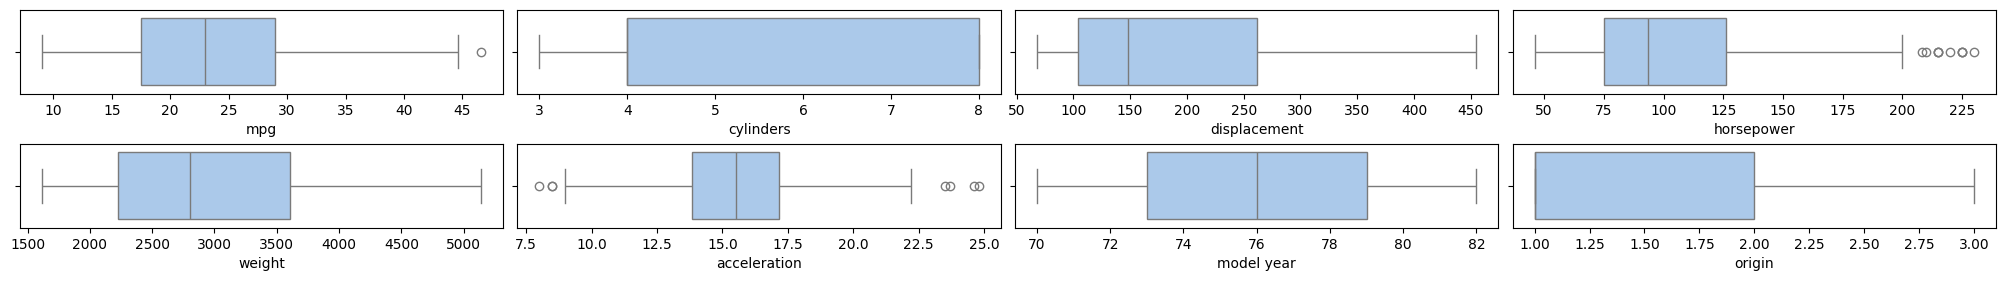

In [33]:
plt.figure(figsize=(20,5))

target = list(data_df.columns)

for i in range(len(target)) :
    plt.tight_layout(pad=0.5)
    plt.subplot(round(len(target)/2),4, i+1)
    sn.boxplot(x=data_df[target[i]], palette="pastel", legend=False, hue=0)
 